# 분류 - 결정트리(Decision Tree)

In [1]:
# UCI 머신러닝 저장소
import pandas as pd
import numpy as np
datapath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(datapath)

In [5]:
df.head()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
len(df.columns)

11

In [4]:
df.columns = ['id', 'clump_thickness', 'cell_size', 'cell_shape', 'marginal_adhesion', 'epithelial', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

# 데이터 탐색

In [6]:
df.describe(include='all')

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698,698.000000,698.000000,698.000000,698.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,401,NaN,NaN,NaN,NaN
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,NaN,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,NaN,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [7]:
df['bare_nuclei'].unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [8]:
df['bare_nuclei'].value_counts()

1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [9]:
df['bare_nuclei'].replace('?', np.nan, inplace=True)

In [10]:
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)

In [11]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 682 non-null    int64
 1   clump_thickness    682 non-null    int64
 2   cell_size          682 non-null    int64
 3   cell_shape         682 non-null    int64
 4   marginal_adhesion  682 non-null    int64
 5   epithelial         682 non-null    int64
 6   bare_nuclei        682 non-null    int32
 7   bland_chromatin    682 non-null    int64
 8   normal_nucleoli    682 non-null    int64
 9   mitoses            682 non-null    int64
 10  class              682 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 61.3 KB


In [13]:
df.describe()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,1.076833e+06,4.441349,3.153959,3.218475,2.832845,3.236070,3.548387,3.445748,2.872434,1.604106,2.700880
std,6.210926e+05,2.822751,3.066285,2.989568,2.865805,2.224214,3.645226,2.451435,3.054065,1.733792,0.954916
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.774540e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171820e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238741e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# 데이터 분할

In [14]:
df['class'].unique()

array([2, 4], dtype=int64)

In [15]:
x = df.loc[:, 'clump_thickness':'mitoses']
y = df['class']

# 데이터 정규화

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
x = StandardScaler().fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=32)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((477, 9), (205, 9), (477,), (205,))

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [23]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [24]:
y_hat = tree_model.predict(x_test)

In [25]:
print('실제 정답 10개:', y_test.values[:10])
print('예측 정답 10개:', y_hat[:10])

실제 정답 10개: [4 2 2 4 2 4 4 2 2 2]
예측 정답 10개: [4 2 2 4 2 4 4 2 2 2]


# 평가

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
print(confusion_matrix(y_test, y_hat))
print('\n')
print(classification_report(y_test, y_hat))

[[129   3]
 [  4  69]]


              precision    recall  f1-score   support

           2       0.97      0.98      0.97       132
           4       0.96      0.95      0.95        73

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



# 군집(clustering) - 비지도학습

### k-means
    각 데이터의 중심거리를 기준으로 클러스터를 만든다
    k의 값이 클수록 모델의 정확도가 개선, 하지만 군집이 많아져서 선택지가 많다 따라서 분석의 효과가 떨어진다

# 데이터 준비

In [28]:
datapath = 'Wholesale customers data.csv'
df=pd.read_csv(datapath)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# 데이터 탐색

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [30]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [33]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df)

In [34]:
x[:10]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689],
       [ 1.44865163,  0.59066829, -0.20480553,  0.33406659, -0.29763704,
        -0.49615501, -0.22813824, -0.02622403],
       [ 1.44865163,  0.59066829,  0.00995035, -0.35231565, -0.10284877,
        -0.53451222,  0.05428041, -0.34785425],
       [ 1.44865163,  0.59066829, -0.34998145, -0.11398095,  0.15535895,
        -0.28931479,  0.09228619,  0.36960125],
       [-0.69029709,  0.59066829

# 모델 선택 k-means

In [35]:
from sklearn.cluster import KMeans

In [40]:
km_model = KMeans(n_clusters=5, n_init=10)

In [41]:
km_model.fit(x)

KMeans(n_clusters=5, n_init=10)

In [43]:
df['cluster'] = km_model.labels_

In [44]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,0


# 시각화

In [45]:
import matplotlib.pyplot as plt

In [50]:
import seaborn as sns

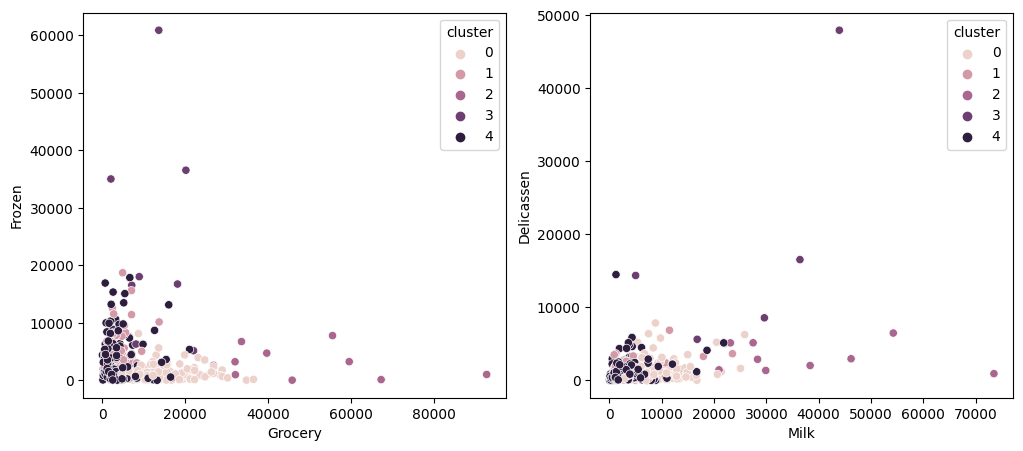

In [52]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Grocery', y='Frozen', hue='cluster')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Milk', y='Delicassen', hue='cluster')
plt.show()

In [53]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,0


In [55]:
mask = (df['cluster'] == 3) | (df['cluster'] == 4)
df2 = df[~mask]

In [56]:
df2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
4,2,3,22615,5410,7198,3915,1777,5185,0
5,2,3,9413,8259,5126,666,1795,1451,0


In [57]:
df2['cluster'].unique()

array([0, 2, 1])

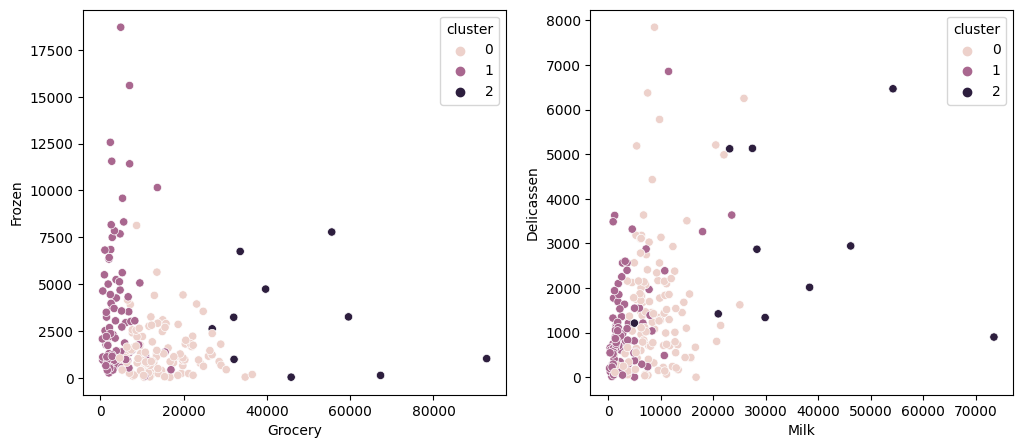

In [59]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df2, x='Grocery', y='Frozen', hue='cluster')

plt.subplot(1,2,2)
sns.scatterplot(data=df2, x='Milk', y='Delicassen', hue='cluster')
plt.show()

# DBSCAN
    데이터가 위치한 공간 밀집도를 기준으로 클러스터를 구분, core point를 구해서 그 점을 기준으로 반지름 R을 정해서 원을 그리고 그 원 안에 들어오는 데이터를 군집으로 만들고 벗어난 데이터는 noise point

In [60]:
filepath = './2016_middle_shcool_graduates_report.xlsx'

In [64]:
df = pd.read_excel(filepath, header=0, index_col=0)
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900


In [63]:
pd.options.display.max_colwidth=20

# 데이터 탐색

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야      415 non-null    object 
 5   남학생수    415 non-null    int64  
 6   여학생수    415 non-null    int64  
 7   일반고     415 non-null    float64
 8   특성화고    415 non-null    float64
 9   과학고     415 non-null    float64
 10  외고_국제고  415 non-null    float64
 11  예고_체고   415 non-null    float64
 12  마이스터고   415 non-null    float64
 13  자사고     415 non-null    float64
 14  자공고     415 non-null    float64
 15  기타진학    415 non-null    float64
 16  취업      415 non-null    int64  
 17  미상      415 non-null    float64
 18  위도      415 non-null    float64
 19  경도      415 non-null    float64
dtypes: float64(12), int64(4), object(4)
memory usage: 68.1+ KB


In [66]:
df['지역'].unique()

array(['성북구', '종로구', '강남구', '서초구', '송파구', '강동구', '양천구', '강서구', '금천구',
       '구로구', '영등포구', '동대문구', '중랑구', '동작구', '관악구', '노원구', '도봉구', '마포구',
       '은평구', '서대문구', '광진구', '성동구', '강북구', '중구', '용산구'], dtype=object)

In [67]:
df['학교명'].unique()

array(['서울대학교사범대학부설중학교', '서울대학교사범대학부설여자중학교', '개원중학교', '개포중학교', '경원중학교',
       '구룡중학교', '압구정중학교', '단국대학교사범대학부속중학교', '대명중학교', '대왕중학교', '대청중학교',
       '대치중학교', '도곡중학교', '동덕여자중학교', '반포중학교', '방배중학교', '봉은중학교', '서문여자중학교',
       '서운중학교', '서일중학교', '서초중학교', '세화여자중학교', '수서중학교', '숙명여자중학교', '신구중학교',
       '신동중학교', '신반포중학교', '신사중학교', '언남중학교', '언북중학교', '언주중학교', '역삼중학교',
       '영동중학교', '원촌중학교', '은성중학교', '이수중학교', '중동중학교', '진선여자중학교', '청담중학교',
       '휘문중학교', '가락중학교', '가원중학교', '강일중학교', '거원중학교', '고덕중학교', '동북중학교',
       '동신중학교', '둔촌중학교', '명일중학교', '문정중학교', '방산중학교', '방이중학교', '배명중학교',
       '배재중학교', '보성중학교', '보인중학교', '상일여자중학교', '석촌중학교', '성내중학교', '성덕여자중학교',
       '세륜중학교', '송파중학교', '신명중학교', '신암중학교', '신천중학교', '아주중학교', '영파여자중학교',
       '오금중학교', '오륜중학교', '오주중학교', '일신여자중학교', '잠신중학교', '잠실중학교', '정신여자중학교',
       '천일중학교', '천호중학교', '풍납중학교', '풍성중학교', '한산중학교', '한영중학교', '강신중학교',
       '경서중학교', '공진중학교', '공항중학교', '금옥중학교', '덕원중학교', '등명중학교', '등원중학교',
       '등촌중학교', '마포중학교', '명덕여자중학교', '목동중학교', '목일중학교', '방원중학교', '방화

In [68]:
df['주야'].unique()

array(['주간'], dtype=object)

In [72]:
from folium import Map, CircleMarker

In [70]:
school_map = Map(location=[37.594942, 127.038909], zoom_start=12)

In [76]:
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    CircleMarker(
        [lat, lng],
        radius=5,
        fill=True,
        fill_color='coral',
        popup=name
    ).add_to(school_map)

In [77]:
school_map

In [81]:
# object 원핫인코딩 변경
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [83]:
onehot_location = LabelEncoder().fit_transform(df.지역)
onehot_code = LabelEncoder().fit_transform(df.코드)
onehot_type = LabelEncoder().fit_transform(df.유형)
onehot_day = LabelEncoder().fit_transform(df.주야)

In [84]:
df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

In [85]:
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,...,자공고,기타진학,취업,미상,위도,경도,location,code,type,day
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,...,0.000,0.004,0,0.000,37.594942,127.038909,16,0,1,0
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,...,0.004,0.031,0,0.000,37.577473,127.003857,22,0,1,0
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,...,0.003,0.009,0,0.003,37.491637,127.071744,0,0,0,0
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,...,0.000,0.019,0,0.000,37.480439,127.062201,0,0,0,0
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,...,0.000,0.010,0,0.000,37.510750,127.008900,14,0,0,0


In [86]:
x = df.loc[:, ['과학고', '외고_국제고', '자사고']]
x.head()

,과학고,외고_국제고,자사고
0,0.018,0.007,0.227
1,0.000,0.035,0.043
2,0.009,0.012,0.090
3,0.013,0.013,0.065
4,0.007,0.010,0.282


In [88]:
x = StandardScaler().fit_transform(x)

In [89]:
from sklearn.cluster import DBSCAN

In [90]:
dfscan = DBSCAN(eps=0.2)

In [91]:
dfscan.fit(x)

DBSCAN(eps=0.2)

In [93]:
np.unique(dfscan.labels_)

array([-1,  0,  1,  2,  3], dtype=int64)

In [95]:
x

array([[ 2.02375287, -0.57972902,  1.84751715],
       [-0.65047921,  1.84782097, -0.48039958],
       [ 0.68663683, -0.14623795,  0.11423133],
       ...,
       [-0.65047921, -1.18661652, -1.0244236 ],
       [-0.65047921, -1.18661652, -1.0244236 ],
       [-0.65047921,  0.89414062, -0.89790638]])

In [97]:
df['cluster'] = dfscan.labels_

In [98]:
group = df.groupby(['cluster'])

In [99]:
colors = {
    -1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red'
}

In [100]:
cluster_map = Map(location=[37.594942, 127.038909], zoom_start=12, tiles='Stamen Terrain')

In [106]:
for name, lat, lng, cluster in zip(df.학교명, df.위도, df.경도, df.cluster):
    CircleMarker(
        [lat, lng],
        radius=5,
        fill=True,
        color= colors[cluster],
        popup=name,
        fill_opacity = 0.7
    ).add_to(cluster_map)

In [107]:
cluster_map